# Network Analysis: Important stations of public transportation 

### **Data** 
Subway stations and lines in Vienna 2018

### **What?** 
- In this notebook, we will find out which stations could turn out to be some kind of **bootlenecks**. Think of ticket terminal breakdowns, overcrowded escalators or train cancellation at a station. Knowing the bottlenecks of a subway or any other transportation network could help to better maintain frequently travelled stations by knowing at which edge a failure would harm most. 
- Another use case concerning transportation networks is finding out which stations are **highly connected** with other lines. Imaging moving to Vienna. You want to know where exactly to move in order to not be dependent on one single subway line. Let's find out stations, which enable you to use as many different lines as possible. <p>

### **Graph-theory**
- Finding out bottleneck nodes within a network -> **"betweenness centrality"**: <br> ... is the ratio between the "number of shortest paths trough a node" and "all possible shortest paths" in a graph. 
- Detecting highly connected nodes -> **"degree centrality"**: <br> ... divides the "number of edges held by a specific node" by the "total number of nodes in the network minus 1". <p>

### 1. Import packages, load and prepare data

In [28]:
#import relevant packages
import matplotlib.pyplot as plt
import numpy as np 
import networkx as nx #package for creating, manipulating, and studying networks
import pandas as pd 

ModuleNotFoundError: No module named 'nxviz'

In [80]:
#load data
stations = pd.read_csv('../input/Vienna subway.csv', sep=";")
print(stations.sample(5))
print("The dataset contains", stations.shape[0], "rows and", stations.shape[1], "columns.")

#define nodes of bikesharing network
network = nx.from_pandas_edgelist(stations, 'Start', 'Stop')

#get amount of stations and paths
print('The subway in vienna consists of', len(network.nodes), 'different stations (nodes) and', 
      len(network.edges), 'connections (edges) between the stations.')

               Start              Stop  Line   Color
77      Schottenring   Rossauer Laende     4   green
27       Donauspital       Hardeggasse     2  purple
87  Bahnhof Meidling  Niederhofstrasse     6   brown
36      Taborstrasse      Schottenring     2  purple
40      Volkstheater   Museumsquartier     2  purple
The dataset contains 104 rows and 4 columns.
The subway in vienna consists of 98 different stations (nodes) and 104 connections (edges) between the stations.


### 2. Betweenness centrality: Find out top 5 possible bottlenecks 

In [81]:
#compute betweenness centrality of stations
bw_centrality = nx.betweenness_centrality(network)

#store betweenness centrality value as attribute of nodes
nx.set_node_attributes(G=network, name='betweenness', values=bw_centrality)

#convert items of bw_centrality dictionary into dataframe
bw_centrality = pd.DataFrame(list(bw_centrality.items()))

#rename columns of data frame
bw_centrality.columns = ["station", "betweenness_centrality"]

#show head rows of data frame
bw_centrality.head()

#get top 5 bottleneck stations
bw_centrality.sort_values(by="betweenness_centrality", ascending=False).iloc[:5,:]

,station,betweenness_centrality
9,Karlsplatz,0.388406
11,Schwedenplatz,0.380799
13,Praterstern,0.380369
10,Stephansplatz,0.307775
68,Laengenfeldgasse,0.291273


### 3. Degree centrality: Find out top 5 connected stations

In [82]:
#compute degree centrality of stations
dg_centrality = nx.degree_centrality(network)

#store betweenness centrality value as attribute of nodes
nx.set_node_attributes(G=network, name='degree', values=dg_centrality)

#convert items of bw_centrality dictionary into dataframe
dg_centrality = pd.DataFrame(list(dg_centrality.items()))

#rename columns of data frame
dg_centrality.columns = ["station", "degree_centrality"]

#show head rows of data frame
dg_centrality.head()

#get top 5 bottleneck stations
dg_centrality.sort_values(by="degree_centrality", ascending=False).iloc[:5,:]

,station,degree_centrality
9,Karlsplatz,0.051546
47,Westbahnhof,0.041237
40,Volkstheater,0.041237
68,Laengenfeldgasse,0.041237
75,Spittelau,0.041237


### 4. Visualization
!!!under construction

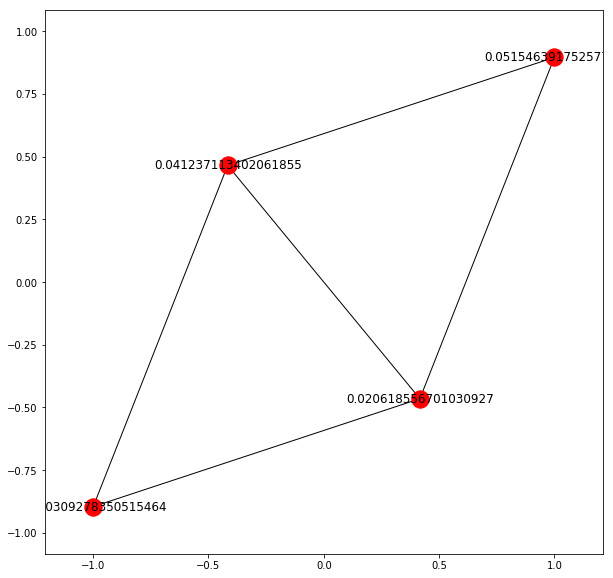

In [88]:
mapping = dict(zip(network.nodes(),nx.get_node_attributes(G=network, name='degree').values()))
network = nx.relabel_nodes(network, mapping)
    
plt.figure(1,figsize=(7,7)) 
nx.draw_networkx(network, with_labels=True)

### 5. Plausibility check and intepretation

Go and assess yourself whether Karlsplatz, Schwedenplatz, Praterstern, Stephansplatz and Laengenfeldgasse should be considered as a bottleneck of subway transportation in vienna and expecially taken care of!
![](http://homepage.univie.ac.at/horst.prillinger/ubahn/m/largemap.png)
